<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Subreddit Classification

## Table of Contents
1. [Background](#1.-Background)  
2. [Problem Statement](#2.-Problem-Statement)  
3. [Import Libraries and Datasets](#3.-Import-Libraries-and-Datasets)   
4. [Data Cleaning and Pre-Processing](#4.-Data-Cleaning-and-Pre-Processing)
5. [Word Frequency Analysis (EDA)](#5.-Word-Frequency-Analysis-(EDA))  

# 1. Background

The importance of healthy sleep cannot be overstated. A lack of sleep or poor quality sleep can result in a variety of health issues, including obesity, diabetes, heart disease, and mental health problems such as anxiety and depression. It can also impair cognitive function, memory, and concentration, which can significantly impact daily activities such as work and driving. By prioritizing healthy sleep habits, individuals can improve their overall health and well-being.

[World Sleep Day](https://worldsleepday.org/) is an annual event that aims to raise awareness of sleep-related issues and promote healthy sleep habits. Celebrated on the Friday before the March Equinox each year, it provides an opportunity to highlight the importance of good sleep hygiene and encourage individuals to prioritize their sleep.

Locally, the [Singapore Sleep Society](http://singaporesleepsociety.org/) is a non-profit organization comprised of volunteers who work to organize events and activities that educate the public about the importance of healthy sleep and offer resources to help individuals achieve better sleep.

<img src="../images/WSD23-LOGO_STACKED.jpg" width="400"/> <img src="../images/SSS.jpg" width="400"/>

[World Sleep Day 2023 Logo](https://worldsleepday.org/toolkit) | [Singapore Sleep Society Logo](https://www.facebook.com/people/Singapore-Sleep-Society/100054198923611/)

# 2. Problem Statement

We, as volunteers, are helping the Singapore Sleep Society in their goal of raising public awareness about healthy sleep habits on World Sleep Day 2023. As part of our efforts, we plan to **develop a web application that can assist individuals in identifying potential sleep disorders based on their reported sleep experiences**. Specifically, we will focus on two disorders: *Sleep Apnea*, characterized by breathing interruptions during sleep, and *Sleep Paralysis*, which involves temporary paralysis upon waking up.

To build the application, we will use natural language processing (NLP) techniques to analyze text data from two subreddits: 'SleepApnea' and 'Sleepparalysis'. Our approach will involve **identifying key words and phrases in users' experiences** and **building a robust classification model that can accurately predict the likelihood of an individual having either Sleep Apnea or Sleep Paralysis**. This application will provide users with valuable insights into their sleep patterns and enable them to seek medical advice if necessary.

# 3. Import Libraries and Datasets

## 3.1 Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

#Pandas settings
pd.set_option("display.max_columns", None)

## 3.2 Import Datasets

In [2]:
apnea = pd.read_csv("../data/SleepApnea.csv")
paralysis = pd.read_csv("../data/Sleepparalysis.csv")

In [3]:
#Conbine the two datasets as a full dataset for preview
dtf = pd.concat([apnea, paralysis], ignore_index=True)

In [4]:
dtf.head()

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,thumbnail_height,top_awarded_type,hide_score,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,link_flair_type,wls,removed_by_category,author_flair_type,domain,allow_live_comments,suggested_sort,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,removed_by,distinguished,subreddit_id,link_flair_background_color,id,is_robot_indexable,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,post_hint,preview,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,edited_on,author_cakeday,brand_safe,retrieved_on
0,SleepApnea,"I've been using APAP for years, but there's so...",t2_vy7juig9,0,Why Does My APAP Do This?,[],r/SleepApnea,False,0.0,NaN,NaN,NaN,True,False,dark,1.0,NaN,public,0.0,{},NaN,NaN,False,NaN,False,False,NaN,{},NaN,1,False,False,self,False,NaN,[],{},NaN,True,text,0.0,NaN,text,self.SleepApnea,False,NaN,NaN,False,True,True,False,False,[],[],False,True,False,False,NaN,[],NaN,NaN,t5_2qs1d,NaN,11oeadx,True,Salt-Test2023,NaN,0,True,no_ads,False,False,NaN,/r/SleepApnea/comments/11oeadx/why_does_my_apa...,no_ads,False,https://www.reddit.com/r/SleepApnea/comments/1...,35954.0,1678521414,0,NaN,False,1678521428,1678521429,2023-03-11 07:56:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SleepApnea,So my question is simple do you clean your mas...,t2_rc0xl,0,Cleaning the Mask with Filtered Tap Water ?,[],r/SleepApnea,False,0.0,NaN,NaN,NaN,True,False,dark,1.0,NaN,public,0.0,{},NaN,NaN,False,NaN,False,False,NaN,{},NaN,1,False,False,self,False,NaN,[],{},NaN,True,text,0.0,NaN,text,self.SleepApnea,False,NaN,NaN,False,False,True,False,False,[],[],False,True,False,False,NaN,[],NaN,NaN,t5_2qs1d,NaN,11odixy,True,stefan00790,NaN,0,True,no_ads,False,False,NaN,/r/SleepApnea/comments/11odixy/cleaning_the_ma...,no_ads,False,https://www.reddit.com/r/SleepApnea/comments/1...,35950.0,1678518636,0,NaN,False,1678518647,1678518648,2023-03-11 07:10:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SleepApnea,"If so, what’s it like? I’m thinking of doing t...",t2_ra32uob1,0,Does anyone here use a Mandibular Advancement ...,[],r/SleepApnea,False,0.0,NaN,NaN,NaN,True,False,dark,1.0,NaN,public,0.0,{},NaN,NaN,False,NaN,False,False,NaN,{},NaN,1,False,False,self,False,NaN,[],{},NaN,True,text,0.0,NaN,text,self.SleepApnea,False,NaN,NaN,False,True,True,False,False,[],[],False,True,False,False,NaN,[],NaN,NaN,t5_2qs1d,NaN,11o8e6u,True,browntableyellow,NaN,0,True,no_ads,False,False,NaN,/r/SleepApnea/comments/11o8e6u/does_anyone_her...,no_ads,False,https://www.reddit.com/r/SleepApnea/comments/1...,35949.0,1678501865,0,NaN,False,1678501878,1678501879,2023-03-11 02:31:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SleepApnea,Just earlier today I found out I had an AHI of...,t2_4ks8ch9n,0,"Diagnosed with mild sleep apnea, what now?",[],r/SleepApnea,False,0.0,NaN,NaN,NaN,True,False,dark,1.0,NaN,public,0.0,{},NaN,NaN,False,NaN,False,False,NaN,{},NaN,1,False,False,self,False,NaN,[],{},NaN,True,text,0.0,NaN,text,self.SleepApnea,False,NaN,NaN,False,True,True,False,False,[],[],False,True,False,False,NaN,[],NaN,NaN,t5_2qs1d,NaN,11o7m0w,True,ikilltelus,NaN,0,True,no_ads,False,False,NaN,/r/SleepApnea/comments/11o7m0w/diagnosed_with_...,no_ads,False,https://www.reddit.com/r/SleepApnea/comment

In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 95 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subreddit                      3388 non-null   object 
 1   selftext                       3226 non-null   object 
 2   author_fullname                3109 non-null   object 
 3   gilded                         3388 non-null   int64  
 4   title                          3388 non-null   object 
 5   link_flair_richtext            3113 non-null   object 
 6   subreddit_name_prefixed        3113 non-null   object 
 7   hidden                         3388 non-null   bool   
 8   pwls                           2914 non-null   float64
 9   link_flair_css_class           0 non-null      float64
 10  thumbnail_height               17 non-null     float64
 11  top_awarded_type               0 non-null      float64
 12  hide_score                     3388 non-null   b

In [6]:
# Check Ratio of two subreddit classes
dtf['subreddit'].value_counts(normalize=True)

Sleepparalysis    0.50059
SleepApnea        0.49941
Name: subreddit, dtype: float64

**Note: Two subreddit classes are balanced.**

# 4. Data Cleaning and Pre-Processing

## 4.1 Feature Selection

In [7]:
# Check the features that have unique values less than or equal to 1
drop_features = list(dtf.nunique()[dtf.nunique().values<= 1].index)
dtf[drop_features].head()

,gilded,link_flair_richtext,hidden,pwls,link_flair_css_class,top_awarded_type,quarantine,link_flair_text_color,author_flair_background_color,subreddit_type,total_awards_received,thumbnail_width,is_original_content,is_meta,category,link_flair_text,is_created_from_ads_ui,author_flair_css_class,author_flair_richtext,gildings,content_categories,link_flair_type,wls,author_flair_type,suggested_sort,view_count,archived,pinned,all_awardings,awarders,media_only,locked,treatment_tags,removed_by,distinguished,link_flair_background_color,discussion_type,whitelist_status,contest_mode,author_patreon_flair,author_flair_text_color,parent_whitelist_status,is_video,author_cakeday,brand_safe
0,0,[],False,0.0,NaN,NaN,False,dark,NaN,public,0.0,NaN,False,False,NaN,NaN,False,NaN,[],{},NaN,text,0.0,text,NaN,NaN,False,False,[],[],False,False,[],NaN,NaN,NaN,NaN,no_ads,False,False,NaN,no_ads,False,NaN,NaN
1,0,[],False,0.0,NaN,NaN,False,dark,NaN,public,0.0,NaN,False,False,NaN,NaN,False,NaN,[],{},NaN,text,0.0,text,NaN,NaN,False,False,[],[],False,False,[],NaN,NaN,NaN,NaN,no_ads,False,False,NaN,no_ads,False,NaN,NaN
2,0,[],False,0.0,NaN,NaN,False,dark,NaN,public,0.0,NaN,False,False,NaN,NaN,False,NaN,[],{},NaN,text,0.0,text,NaN,NaN,False,False,[],[],False,False,[],NaN,NaN,NaN,NaN,no_ads,False,False,NaN,no_ads,False,NaN,NaN
3,0,[],False,0.0,NaN,NaN,False,dark,NaN,public,0.0,NaN,False,False,NaN,NaN,False,NaN,[],{},NaN,text,0.0,text,NaN,NaN,False,False,[],[],False,False,[],NaN,NaN,NaN,NaN,no_ads,False,False,NaN,no_ads,False,NaN,NaN
4,0,[],False,0.0,NaN,NaN,False,dark,NaN,public,0.0,NaN,False,False,NaN,NaN,False,NaN,[],{},NaN,text,0.0,text,NaN,NaN,False,False,[],[],False,False,[],NaN,NaN,NaN,NaN,no_ads,False,False,NaN,no_ads,False,NaN,NaN


In [8]:
#Drop the columns that have unique values less than or equal to 1
dtf.drop(columns=drop_features, axis=1, inplace=True)

In [9]:
#Check the features which have none values >90%
ratio = dtf.isnull().sum()/dtf.shape[0]
drop_features = list(ratio[ratio>0.90].index)
dtf[drop_features].head()

,thumbnail_height,author_flair_template_id,secure_media,removed_by_category,author_flair_text,media,post_hint,preview,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,edited_on,retrieved_on
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Drop the columns which have none values >90%
dtf.drop(columns=drop_features, axis=1, inplace=True)

In [11]:
#Drop the features that directly indicated subreddit classes.
drop_features = ['subreddit_name_prefixed', 'domain', 'subreddit_id', 'permalink', 'url']
dtf.drop(columns=drop_features, axis=1, inplace=True)

In [12]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subreddit               3388 non-null   object 
 1   selftext                3226 non-null   object 
 2   author_fullname         3109 non-null   object 
 3   title                   3388 non-null   object 
 4   hide_score              3388 non-null   bool   
 5   upvote_ratio            3113 non-null   float64
 6   media_embed             3388 non-null   object 
 7   is_reddit_media_domain  3388 non-null   bool   
 8   secure_media_embed      3388 non-null   object 
 9   score                   3388 non-null   int64  
 10  author_premium          3109 non-null   object 
 11  thumbnail               3388 non-null   object 
 12  edited                  3388 non-null   bool   
 13  is_self                 3388 non-null   bool   
 14  allow_live_comments     3113 non-null   

In [13]:
#Check all str features
dtf.select_dtypes(include='object').head()

,subreddit,selftext,author_fullname,title,media_embed,secure_media_embed,author_premium,thumbnail,allow_live_comments,no_follow,can_gild,id,is_robot_indexable,author,send_replies,utc_datetime_str
0,SleepApnea,"I've been using APAP for years, but there's so...",t2_vy7juig9,Why Does My APAP Do This?,{},{},False,self,False,True,True,11oeadx,True,Salt-Test2023,True,2023-03-11 07:56:54
1,SleepApnea,So my question is simple do you clean your mas...,t2_rc0xl,Cleaning the Mask with Filtered Tap Water ?,{},{},False,self,False,False,True,11odixy,True,stefan00790,True,2023-03-11 07:10:36
2,SleepApnea,"If so, what’s it like? I’m thinking of doing t...",t2_ra32uob1,Does anyone here use a Mandibular Advancement ...,{},{},False,self,False,True,True,11o8e6u,True,browntableyellow,True,2023-03-11 02:31:05
3,SleepApnea,Just earlier today I found out I had an AHI of...,t2_4ks8ch9n,"Diagnosed with mild sleep apnea, what now?",{},{},False,self,False,True,True,11o7m0w,True,ikilltelus,True,2023-03-11 01:53:27
4,SleepApnea,It’s been a long long journey. Based in the UK...,t2_d7ieg,Finally got CPAP after 2 years of waiting 🎉,{},{},False,self,False,True,True,11o49qi,True,londonactor,True,2023-03-10 23:23:57


In [14]:
#Select the target 'subreddit' and text features related to the subreddit classes
select_features =['subreddit', 'selftext', 'title']
dtf = dtf[select_features]

In [15]:
dtf.head()

,subreddit,selftext,title
0,SleepApnea,"I've been using APAP for years, but there's so...",Why Does My APAP Do This?
1,SleepApnea,So my question is simple do you clean your mas...,Cleaning the Mask with Filtered Tap Water ?
2,SleepApnea,"If so, what’s it like? I’m thinking of doing t...",Does anyone here use a Mandibular Advancement ...
3,SleepApnea,Just earlier today I found out I had an AHI of...,"Diagnosed with mild sleep apnea, what now?"
4,SleepApnea,It’s been a long long journey. Based in the UK...,Finally got CPAP after 2 years of waiting 🎉


In [16]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3388 non-null   object
 1   selftext   3226 non-null   object
 2   title      3388 non-null   object
dtypes: object(3)
memory usage: 79.5+ KB


In [17]:
dtf.describe()

,subreddit,selftext,title
count,3388,3226,3388
unique,2,3114,3311
top,Sleepparalysis,[removed],Is this sleep paralysis?
freq,1696,68,19


## 4.2 Missing Values Handling

In [18]:
#Fill empty string for none values in 'selftext'
dtf['selftext'] = dtf['selftext'].fillna('')

In [19]:
dtf.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [20]:
#Replace the '[removed]' and '[deleted]' with empty string in 'selftext'
dtf['selftext'] = dtf['selftext'].map(lambda x: x.replace('[removed]', '') if x == '[removed]' else x)
dtf['selftext'] = dtf['selftext'].map(lambda x: x.replace('[deleted]', '') if x == '[deleted]' else x)

## 4.3 Pre-Processing

In [21]:
dtf.shape

(3388, 3)

In [22]:
#Remove duplicated rows in the dataframe
dtf = dtf.drop_duplicates()

In [23]:
dtf.shape

(3379, 3)

### 4.3.1 Text Cleaning

In [24]:
# Create stopwords, including all noise words appeared in both subreddits, e.g. 'sleep', 'feel' and the words literally wrote subreddit names, e.g. "apnea","paralysis"
lst_stopwords = create_stopwords(["english"], 
                                 lst_add_words=["sleep","sleeping","slept","apnea","paralysis","sleepapnea","sleepparalysis","sp","know","think","thought","thinking","feel","felt","feeling","like",
                                                "fall","falling","fell","asleep","night","similar","experience","https","www","com","really","maybe","u","im","ive","thats","dont","didnt","yeah","ha","wa",
                                                "time","hour","day","year","month","week","ago"],
                                 lst_keep_words=[])
lst_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ago',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'apnea',
 'are',
 'aren',
 "aren't",
 'as',
 'asleep',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'com',
 'couldn',
 "couldn't",
 'd',
 'day',
 'did',
 'didn',
 "didn't",
 'didnt',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'experience',
 'fall',
 'falling',
 'feel',
 'feeling',
 'fell',
 'felt',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'hour',
 'how',
 'https',
 'i',
 'if',
 'im',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'ive',
 'just',
 'know',
 'like',
 'll',
 'm',
 'ma',
 'maybe',
 'me',
 'mightn',
 "mightn't",
 'month',
 'more',
 'most

In [25]:
# preprocess selftext
dtf = add_preprocessed_text(dtf,"selftext",lst_regex=None,punkt=True,lower=True,lst_stopwords=lst_stopwords,stemm=False,lemm=True)
dtf.head()

--- found NAs ---
   selftext selftext_clean
14                        
31                        
40                        
49                        
56                        


,subreddit,selftext,title,selftext_clean
0,SleepApnea,"I've been using APAP for years, but there's so...",Why Does My APAP Do This?,using apap something bugging resmed 10 autoset...
1,SleepApnea,So my question is simple do you clean your mas...,Cleaning the Mask with Filtered Tap Water ?,question simple clean mask aswell distilled wa...
2,SleepApnea,"If so, what’s it like? I’m thinking of doing t...",Does anyone here use a Mandibular Advancement ...,whats mouth guard v cpap machine
3,SleepApnea,Just earlier today I found out I had an AHI of...,"Diagnosed with mild sleep apnea, what now?",earlier today found ahi 13 per enough diagnose...
4,SleepApnea,It’s been a long long journey. Based in the UK...,Finally got CPAP after 2 years of waiting 🎉,long long journey based uk everything thankful...


In [26]:
# preprocess title
dtf = add_preprocessed_text(dtf,"title",lst_regex=None,punkt=True,lower=True,lst_stopwords=lst_stopwords,stemm=False,lemm=True)
dtf.head()

--- found NAs ---
                               title title_clean
79                             what?            
82       I think I have sleep apnea.            
157  sleep apnea and sleep paralysis            
213                     Sleep Apnea?            
271                      Sleep Apnea            


,subreddit,selftext,title,selftext_clean,title_clean
0,SleepApnea,"I've been using APAP for years, but there's so...",Why Does My APAP Do This?,using apap something bugging resmed 10 autoset...,doe apap
1,SleepApnea,So my question is simple do you clean your mas...,Cleaning the Mask with Filtered Tap Water ?,question simple clean mask aswell distilled wa...,cleaning mask filtered tap water
2,SleepApnea,"If so, what’s it like? I’m thinking of doing t...",Does anyone here use a Mandibular Advancement ...,whats mouth guard v cpap machine,doe anyone use mandibular advancement devicemo...
3,SleepApnea,Just earlier today I found out I had an AHI of...,"Diagnosed with mild sleep apnea, what now?",earlier today found ahi 13 per enough diagnose...,diagnosed mild
4,SleepApnea,It’s been a long long journey. Based in the UK...,Finally got CPAP after 2 years of waiting 🎉,long long journey based uk everything thankful...,finally got cpap 2 waiting


### 4.3.2 Length Analysis

In [27]:
#Combine the two original text columns together for backup info
dtf['selftext_title'] = dtf['selftext'] + ' ' + dtf['title']

In [28]:
#Combine the two text cleaned columns together for analysis
dtf['selftext_title_clean'] = dtf['selftext_clean'] + ' ' + dtf['title_clean']

In [29]:
dtf = add_text_length(dtf, "selftext_title_clean")
dtf.head()

                  min        mean       max
word_count        2.0   68.703444   595.000
char_count       11.0  388.775660  3495.000
avg_word_length   3.0    5.684634    22.125


,subreddit,selftext,title,selftext_clean,title_clean,selftext_title,selftext_title_clean,word_count,char_count,avg_word_length
0,SleepApnea,"I've been using APAP for years, but there's so...",Why Does My APAP Do This?,using apap something bugging resmed 10 autoset...,doe apap,"I've been using APAP for years, but there's so...",using apap something bugging resmed 10 autoset...,77,443,5.753247
1,SleepApnea,So my question is simple do you clean your mas...,Cleaning the Mask with Filtered Tap Water ?,question simple clean mask aswell distilled wa...,cleaning mask filtered tap water,So my question is simple do you clean your mas...,question simple clean mask aswell distilled wa...,50,261,5.220000
2,SleepApnea,"If so, what’s it like? I’m thinking of doing t...",Does anyone here use a Mandibular Advancement ...,whats mouth guard v cpap machine,doe anyone use mandibular advancement devicemo...,"If so, what’s it like? I’m thinking of doing t...",whats mouth guard v cpap machine doe anyone us...,13,76,5.846154
3,SleepApnea,Just earlier today I found out I had an AHI of...,"Diagnosed with mild sleep apnea, what now?",earlier today found ahi 13 per enough diagnose...,diagnosed mild,Just earlier today I found out I had an AHI of...,earlier today found ahi 13 per enough diagnose...,166,921,5.548193
4,SleepApnea,It’s been a long long journey. Based in the UK...,Finally got CPAP after 2 years of waiting 🎉,long long journey based uk everything thankful...,finally got cpap 2 waiting,It’s been a long long journey. Based in the UK...,long long journey based uk everything thankful...,58,317,5.465517


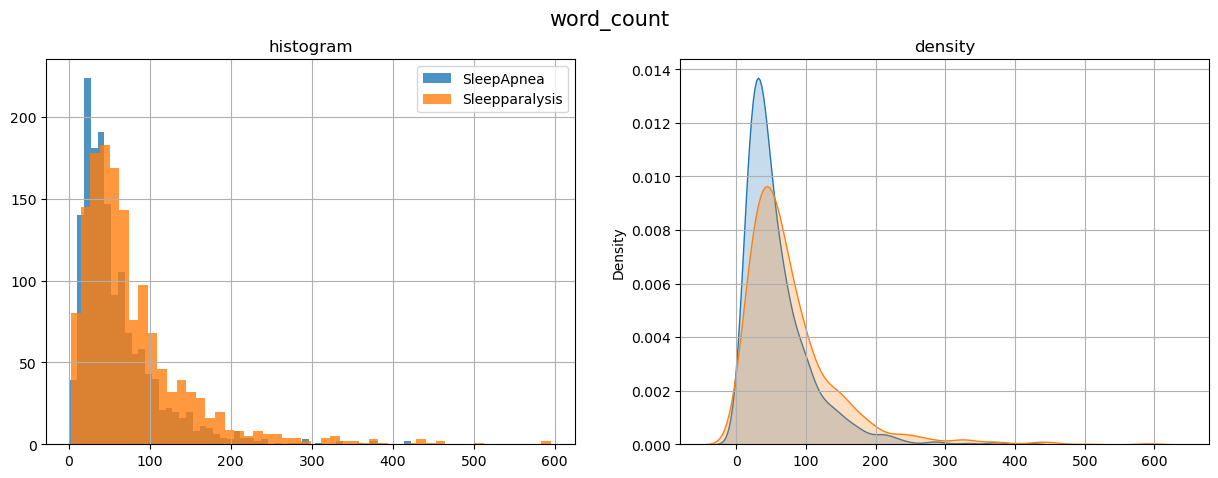

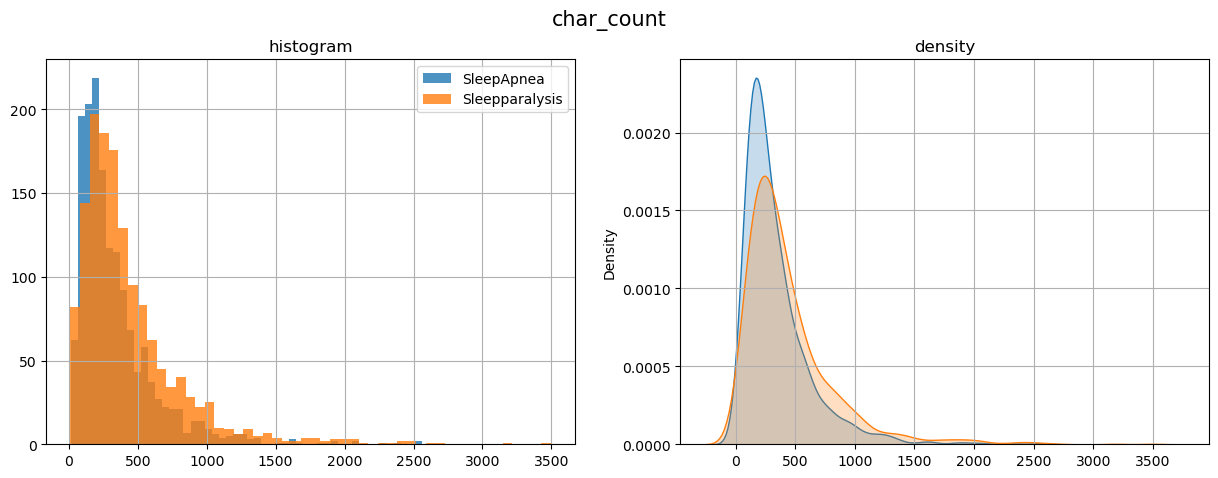

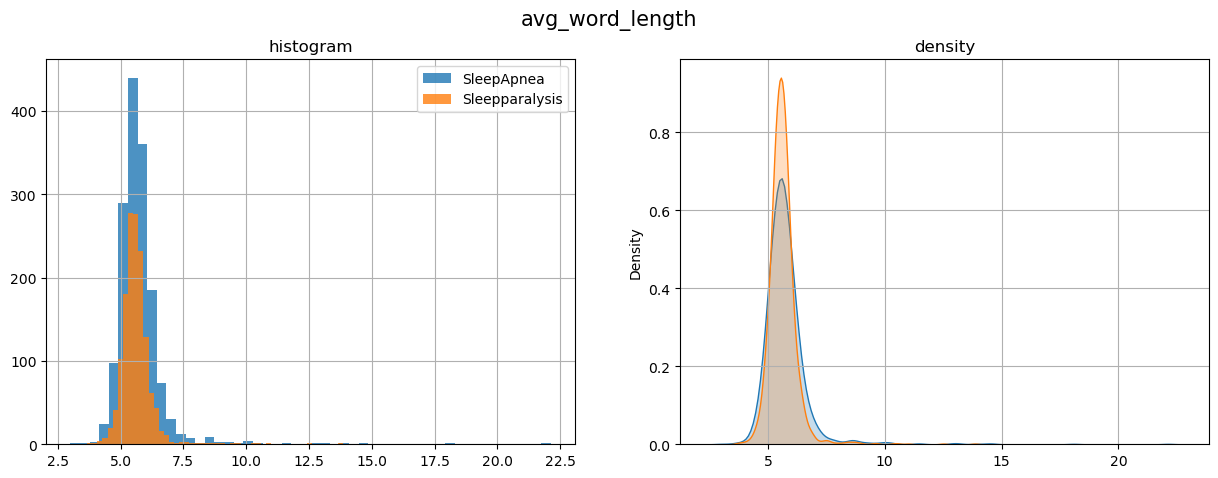

In [30]:
for col in ["word_count","char_count","avg_word_length"]:
    plot_distributions(dtf, x=col, y="subreddit", bins=50, figsize=(15,5))

***Interpretation: The word count, character count, and average word length did not show significant differences between sleep apnea and sleep paralysis. Therefore, they will not be considered as key features for classification modeling.*** 

In [31]:
dtf.shape

(2991, 10)

In [32]:
# Check Ratio of two subreddit classes
dtf['subreddit'].value_counts(normalize=True)

SleepApnea        0.52123
Sleepparalysis    0.47877
Name: subreddit, dtype: float64

**Note: Two subreddit classes are still generally balanced.**

In [33]:
dtf.to_csv('../data/data_cleaned.csv', index=False)

## 4.4 Data Dictionary

The final cleaned data has 10 columns (9 features + 1 target variable) which contains 2991 records from two subreddits 'SleepApnea' and 'Sleepparalysis'.

|Feature|Type|Description| 
|---|---|---|
|subreddit|string|Two subreddits 'SleepApnea' and 'Sleepparalysis'. This is the target variable that we are trying to predict.|
|selftext|string|Original selftext of a submission|
|title|string|Original title of a submission|
|selftext_title|string|Combined original selftext and title|
|selftext_clean|string|Selftext after text clean|
|title_clean|string|Title after text clean|
|selftext_title_clean|string|Combined cleaned selftext and title|
|word_count|int|Word count for 'selftext_title_clean'|
|char_count|int|Character count for 'selftext_title_clean'|
|avg_word_length|float|Average word length for 'selftext_title_clean'|

# 5. Word Frequency Analysis (EDA)

## 5.1 Plot by WordCloud

# SleepApnea:


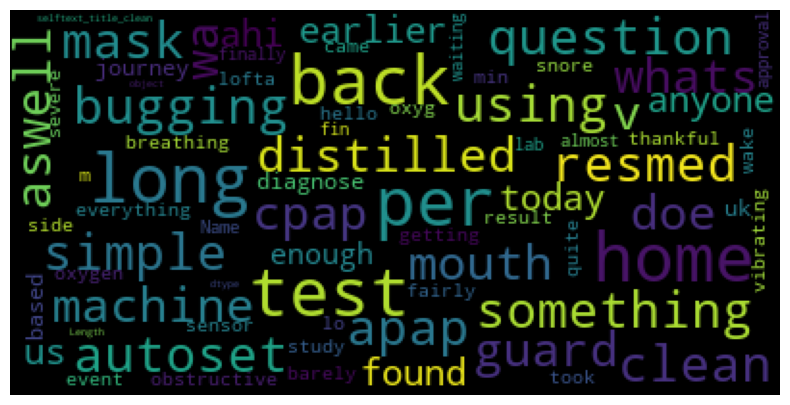

# Sleepparalysis:


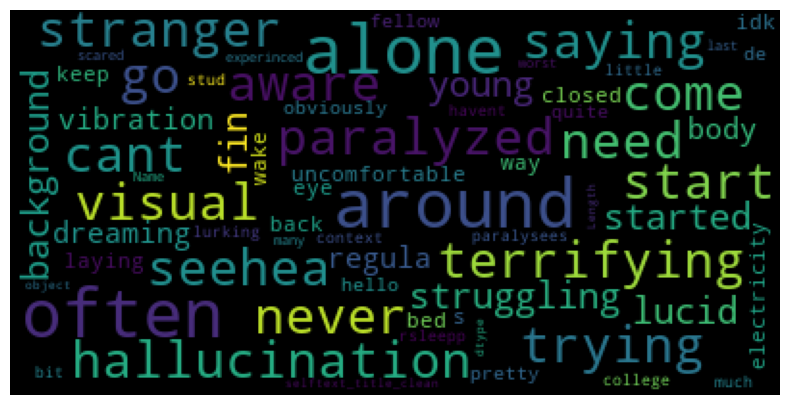

In [34]:
for y in dtf["subreddit"].unique():
    print("# {}:".format(y))
    plot_wordcloud(corpus=dtf[dtf["subreddit"]==y]["selftext_title_clean"], max_words=150, max_font_size=35, figsize=(10,5))

***Interpretation: The wordcloud plot for two subreddits provides a quick visualization of the most common words in each text corpus. We can observe that the most common words for Sleep Apnea and Sleep Paralysis are different. The most common words for Sleep Apnea include 'test', 'home', 'machine' and etc., while the most common words for Sleep Paralysis include 'stranger', 'terrifying', 'hallucination' and etc. However, a major disadvantage of the wordcloud plot is that it cannot be quantified. Therefore, it is important to conduct further analysis with other types of plots.*** 

## 5.2 Plot by CountVectorizer

In [35]:
dtf.rename(columns={'subreddit':'SUBREDDIT'}, inplace=True)
target = dtf['SUBREDDIT']
target_name = 'SUBREDDIT'

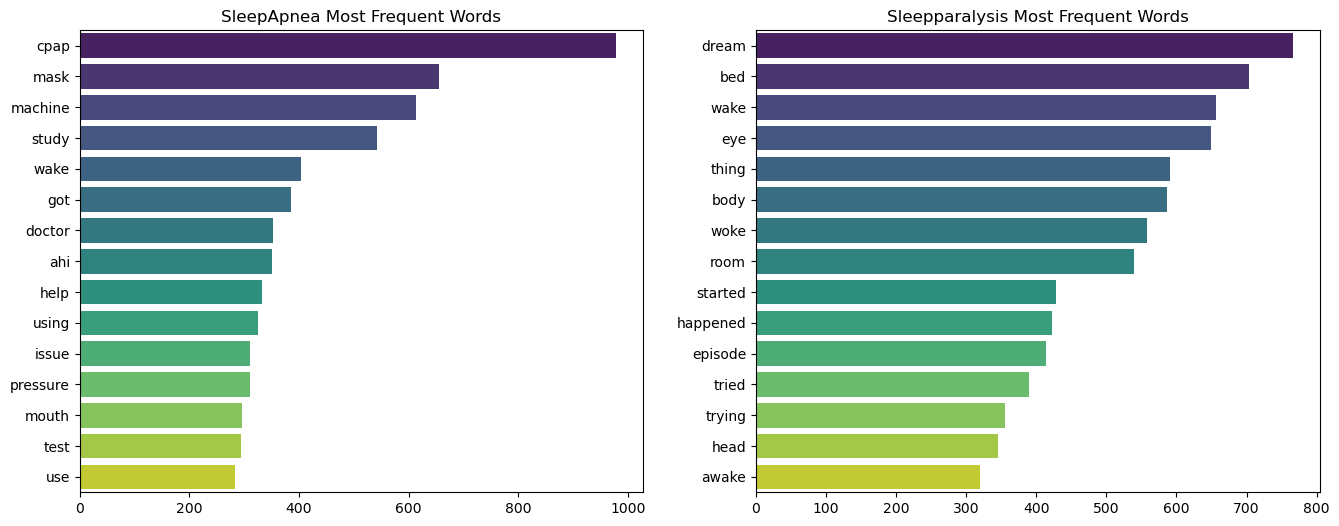

In [36]:
cv = feature_extraction.text.CountVectorizer(stop_words='english')
text_df = word_freq(dtf['selftext_clean'], vectorizer=cv)
plot_word_freq(text_df,target,target_name)

***Interpretation: The word frequency plot by CountVectorizer for two subreddits provides a visual representation of the most commonly used words in each text corpus. One advantage of this plot is that it quantifies the frequency of each word, which allows for more precise analysis. From the plot we can observe that for Sleep Apnea, the top 3 common words are 'cpap', 'mask', and 'machine', while for Sleep Paralysis, the top 3 common words are 'dream', 'bed', and 'wake'. However, it does not provide any information about the context of the words. Therefore, it is important to supplement the analysis with a 2-gram plot to gain more information about the context in which the words are used.*** 

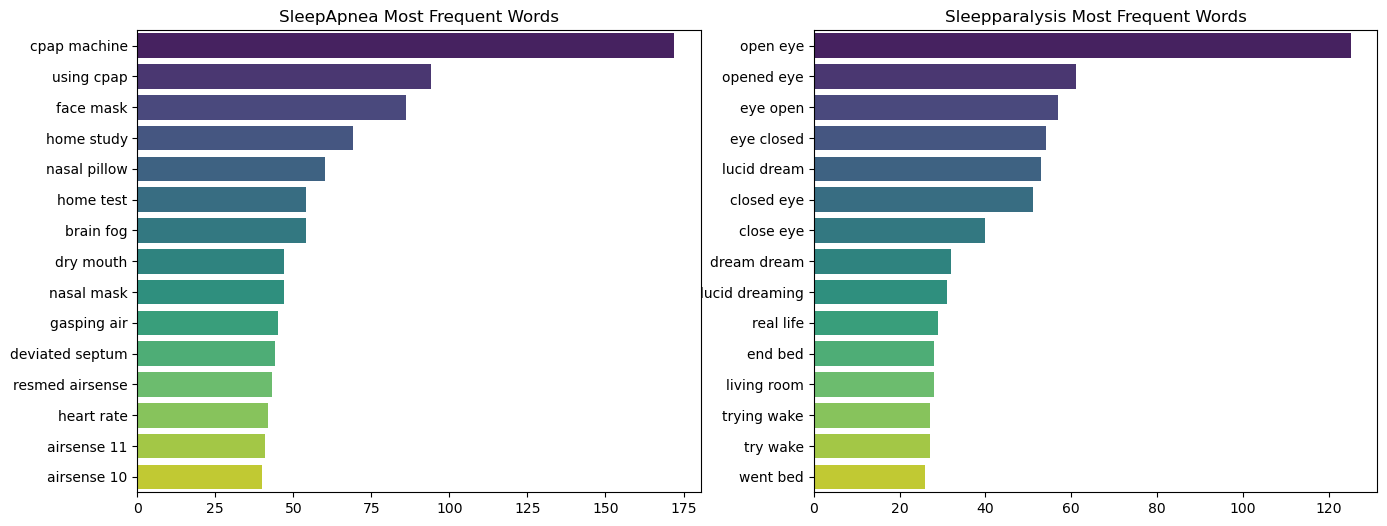

In [37]:
cv = feature_extraction.text.CountVectorizer(ngram_range=(2,2), stop_words='english')
text_df = word_freq(dtf['selftext_clean'], vectorizer=cv)
plot_word_freq(text_df,target,target_name)

***Interpretation: The 2-gram plot for two subreddits provides a visual representation of the most commonly used phrases in each text corpus. It shows the context of the words rather than just single words. From the plot we can observe that for Sleep Apnea, the top 3 common phrases are 'cpap machine', 'using cpap', and 'face mask'. On the other hand, for Sleep Paralysis, the top 3 common phrases are 'open eye' (note that 'opened eye' and 'eye open' have similar meaning), 'eye closed', and 'lucid dream'.***

## 5.3 Plot by TfidfVectorizer

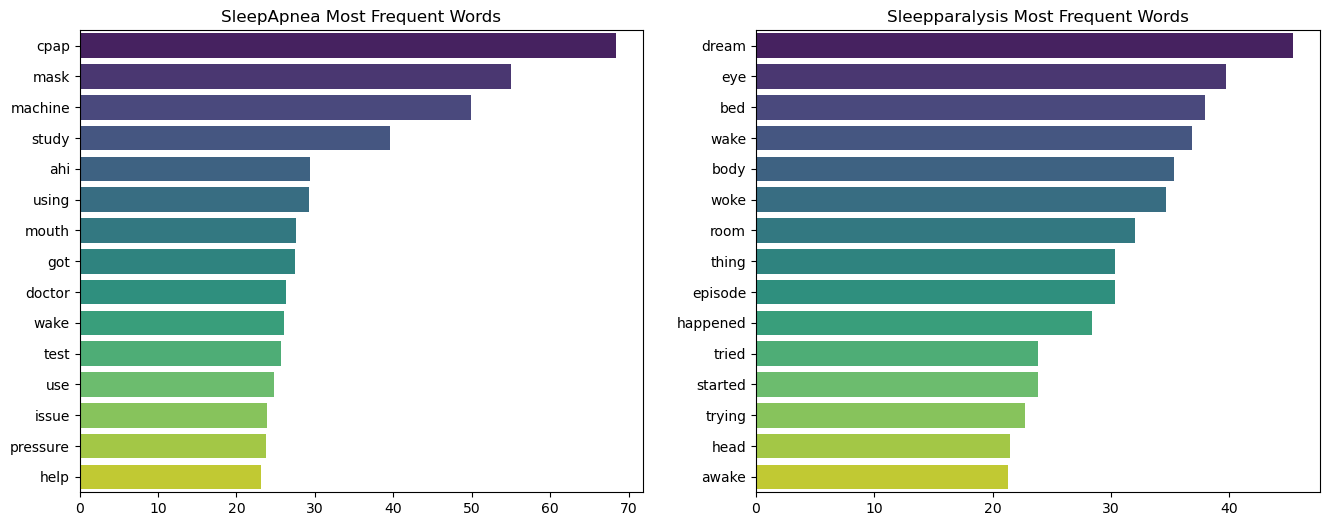

In [38]:
tv = feature_extraction.text.TfidfVectorizer(stop_words='english')
text_df = word_freq(dtf['selftext_clean'], vectorizer=tv)
plot_word_freq(text_df,target,target_name)

***Interpretation: Similar like the plot by CountVectorizer, the word frequency plot by TfidfVectorizer for two subreddits provides a visual representation of the most commonly used words in each text corpus. But one advantage of this plot is that it quantifies the frequency of each word while also taking into account the importance of the word in the entire corpus. This allows for more precise analysis, especially when dealing with frequently occurring but less meaningful words. From the plot we can observe that for Sleep Apnea the top 3 common words remain the same as those in the plot by CountVectorizer but for Sleep Paralysis, the top 3 common words are changed to 'dream', 'eye', and 'bed'.*** 

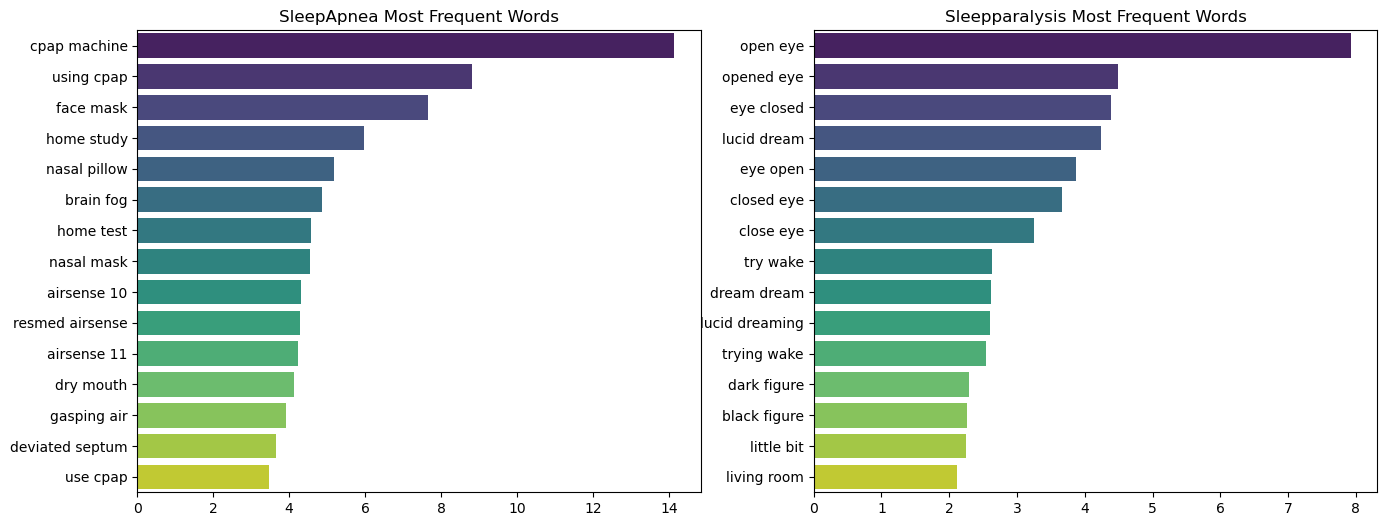

In [39]:
tv = feature_extraction.text.TfidfVectorizer(ngram_range=(2,2),stop_words='english')
text_df = word_freq(dtf['selftext_clean'], vectorizer=tv)
plot_word_freq(text_df,target,target_name)

***Interpretation: Similar like the plot by CountVectorizer, the 2-gram plot by TfidfVectorizer for two subreddits provides a visual representation of the most commonly used phrases in each text corpus. From the plot we can observe that for two subreddits the top 3 common phrases remain the same as those in the plot by CountVectorizer, but the top 10 common phrases are different compared to the plot by CountVectorizer.***